In [1]:
%pylab inline
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import tracpy.tools
import tracpy
import glob
import cartopy.crs as ccrs
import cmocean as cmo
import cartopy
import tracpy.plotting
import octant
from matplotlib import cm, colors

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"

In [3]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [ ]:
grid.h

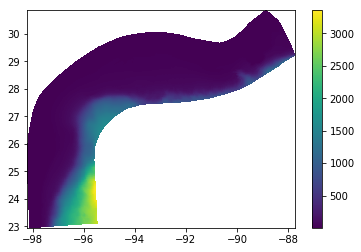

In [4]:
# plt.pcolormesh(grid.lon_rho, grid.lat_rho, grid.zwt0[11])
plt.pcolormesh(grid.lon_rho, grid.lat_rho, grid.h)
plt.colorbar()

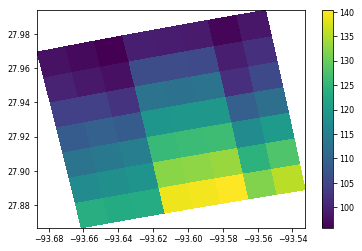

In [146]:
plt.pcolormesh(grid.lon_rho[27:35,301:310], grid.lat_rho[27:35,301:310], grid.h[27:35,301:310])
plt.colorbar()

In [180]:
d["h"].shape

(191, 671)

In [120]:
z_w = octant.roms.nc_depths(d,"w")

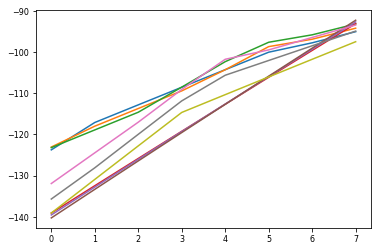

In [135]:
plt.plot( z_w[0,0,27:35,301:310] );
# plt.legend( ["z_w 11", "z_w 12"] )
# [27:35,301:310]
# plt.imshow( -d["h"][27:35,301:310] )
# plt.colorbar()

# s_rho = -24m is rho layer 11

### z_w

In [5]:
d = nc.Dataset(loc)

End time: `datetime.datetime(2016, 12, 31, 18, 0)`

In [209]:
datetime.datetime.fromtimestamp(d['ocean_time'][-10:][-1])

datetime.datetime(2016, 12, 31, 18, 0)

`d["salt"].shape` = t, z, y, x

In [183]:
x = d["lon_rho"][:,:]
y = d["lat_rho"][:,:]

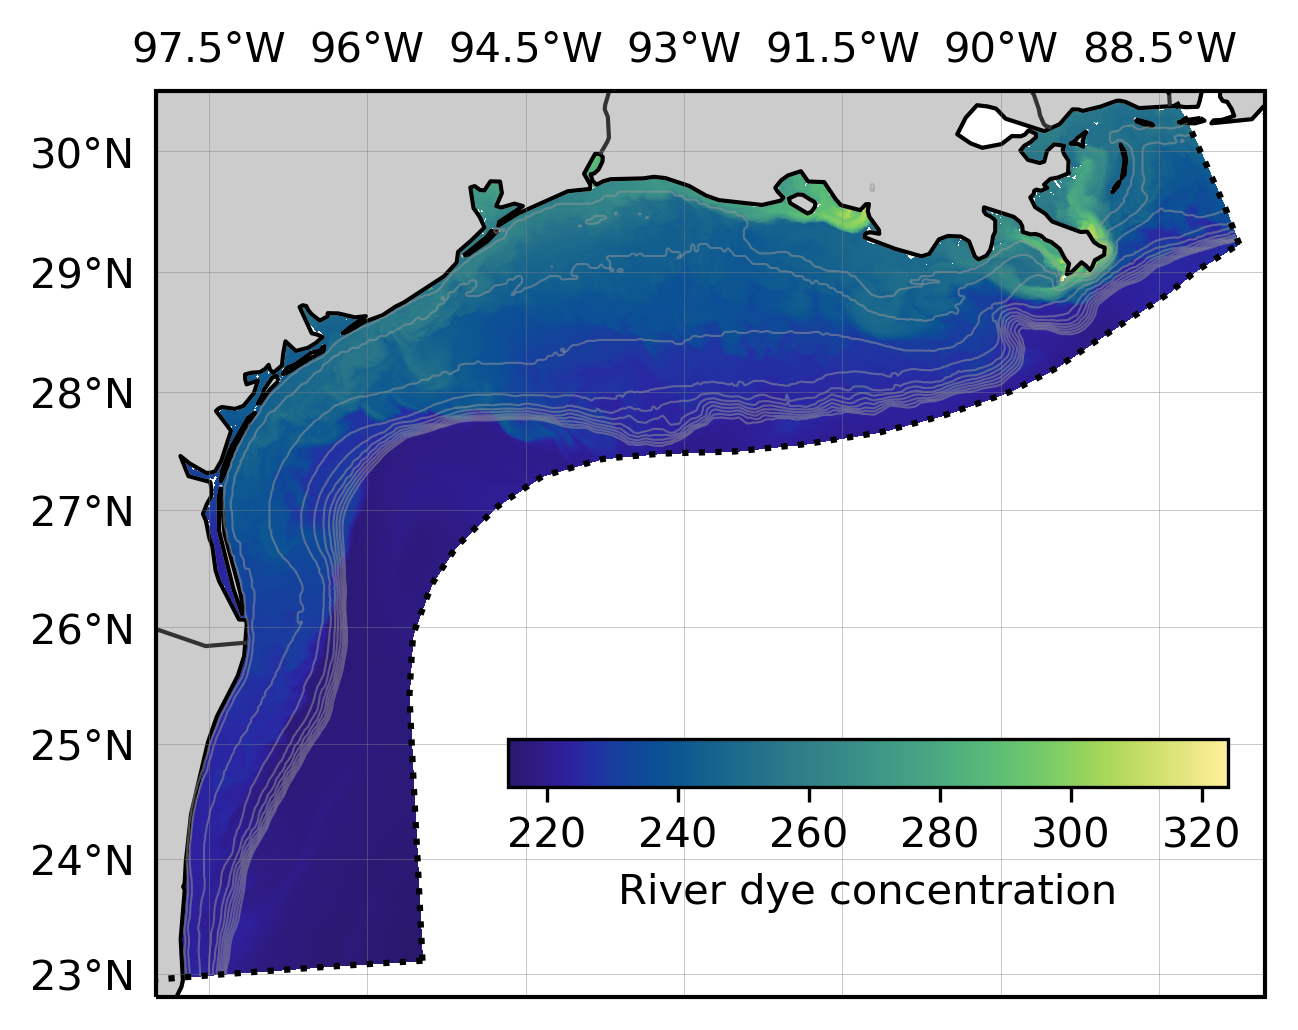

In [35]:
fresh = d["dye_01"][10010,29,:,:]
fig = plt.figure(figsize=(6,4),dpi=300)
ax = fig.add_subplot(111, projection=ccrs.Mercator())

fig, ax = tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],col='lightgrey', halpha=0.5, outline=[1, 1, 0, 1], res='50m',fontsize=10,proj=cartopy.crs.Mercator()) 
# ax.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], depth,transform=ccrs.PlateCarree())
pcm = ax.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], fresh, transform=ccrs.PlateCarree(), cmap=cmo.cm.haline)

pcm.set_cmap( cmo.cm.haline )
cax = fig.add_axes( [0.4,0.3,0.4,0.04] )  # colorbar axes
cb = fig.colorbar(pcm, cax=cax, orientation='horizontal')
cb.set_label('River dye concentration')




In [117]:
# datetime.datetime.fromtimestamp(d["ocean_time"][0])
datetime.datetime.fromtimestamp(d["ocean_time"][-4400])

datetime.datetime(2016, 7, 1, 12, 0)

In [37]:
def calc_cmap(cmap=cmo.cm.haline, levels=(37-np.exp(np.linspace(0,np.log(37.), 10)))[::-1]-1):
    '''
    Colormap for salinity for river plumes, with bigger chunks of salinity per color
    section at lower salinity than higher.
    Help from http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
    Kristen Thyng, Feb 2014
    Inputs:
        cmap        Colormap name to use, e.g. 'YlGnBu'
        levels      edges of colors, as in contourf, to stretch
                    colormap. e.g. for salinity
                    levels = (37-exp(linspace(0,log(36.), 10)))[::-1]-1
    Outputs:
        my_cmap     colormap instance
    '''

    N = levels.size

    # Colors on either side of the edges
    
    rgb0 = cm.get_cmap(cmap)( np.linspace(0.0, 1.0, N) )[:,0:3]

    red = np.vstack((levels/levels.max(),
                    rgb0[:,0],
                    rgb0[:,0])).T
    red = tuple(map(tuple, red))

    green = np.vstack((levels/levels.max(),
                    rgb0[:,1],
                    rgb0[:,1])).T
    green = tuple(map(tuple, green))

    blue = np.vstack((levels/levels.max(),
                    rgb0[:,2],
                    rgb0[:,2])).T
    blue = tuple(map(tuple, blue))
    

    cdict = {'red':red, 'green':green, 'blue':blue}
    my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 256)

    return my_cmap



In [38]:
levels = (37-np.exp(np.linspace(0,np.log(37.), 10)))[::-1] # log for salinity, 0 to 36
# print(levels)
levels[0] = 0
cmap = calc_cmap(cmo.cm.haline, levels)
ilevels = [0,1,2,3,4,5,8] # which levels to label
ticks = [int(tick) for tick in levels[ilevels]] # plot ticks

In [39]:
ticks

[0, 12, 20, 25, 29, 32, 35]

In [ ]:
d["h"][]

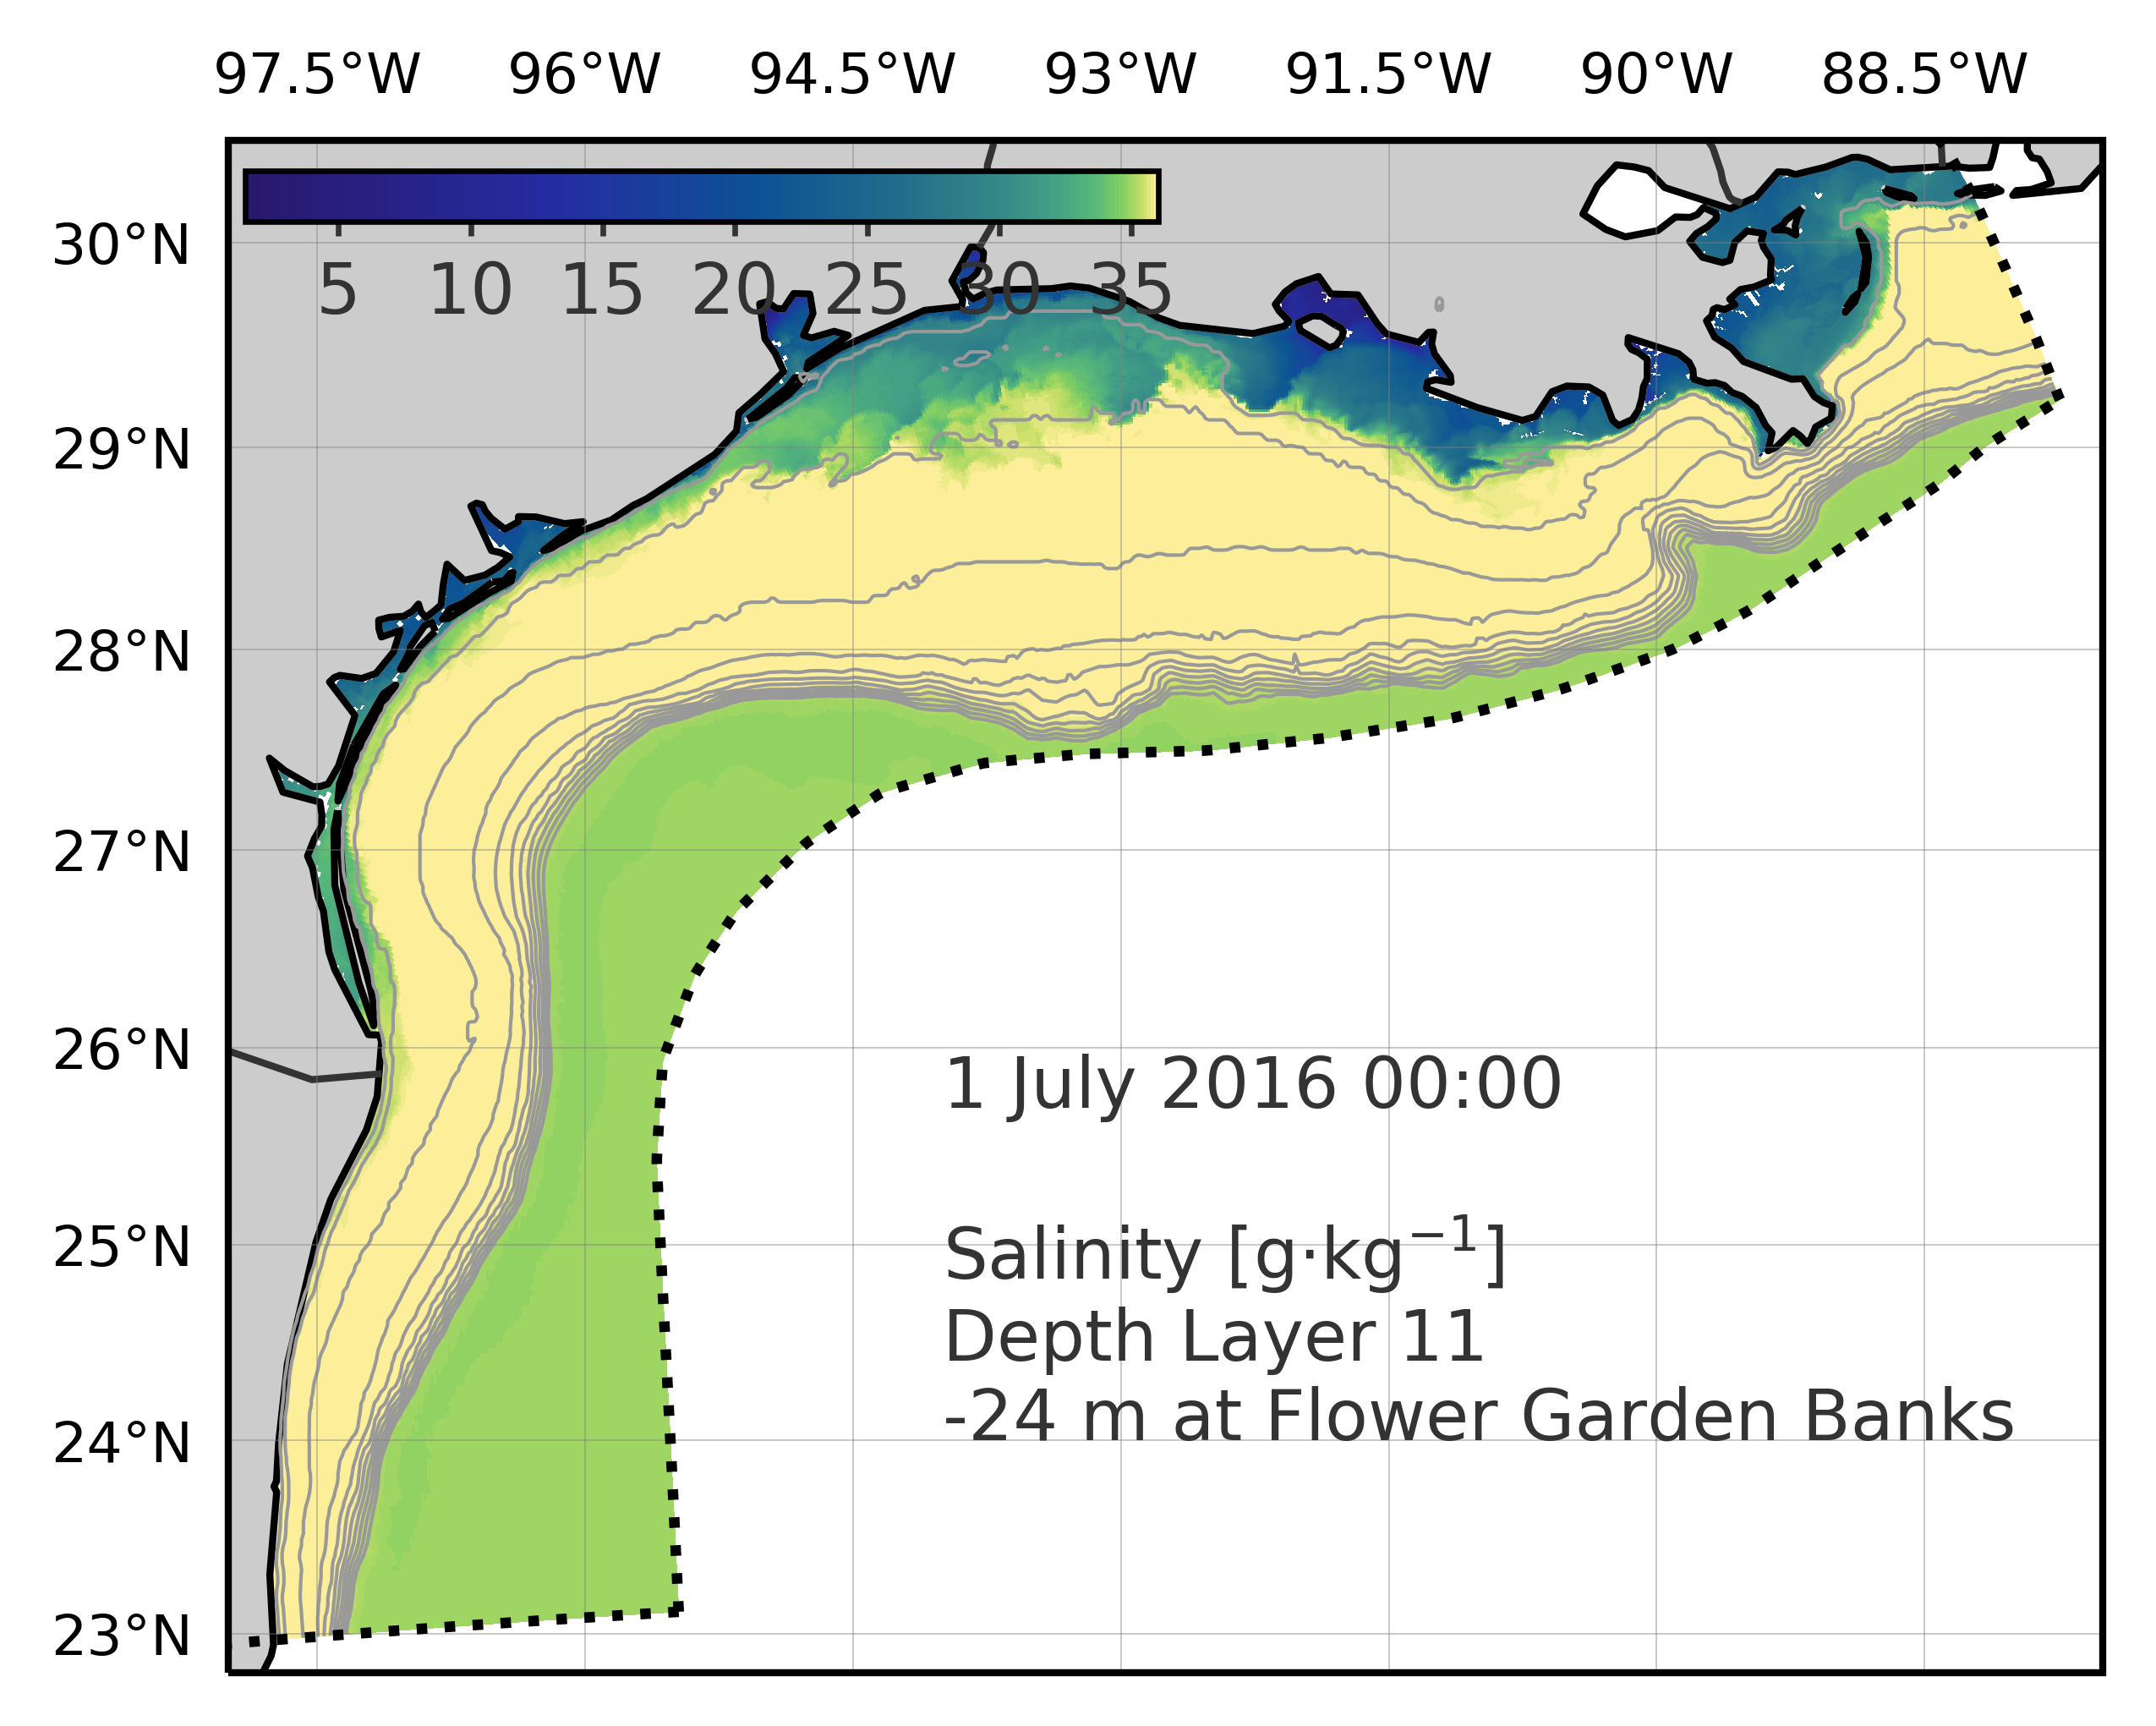

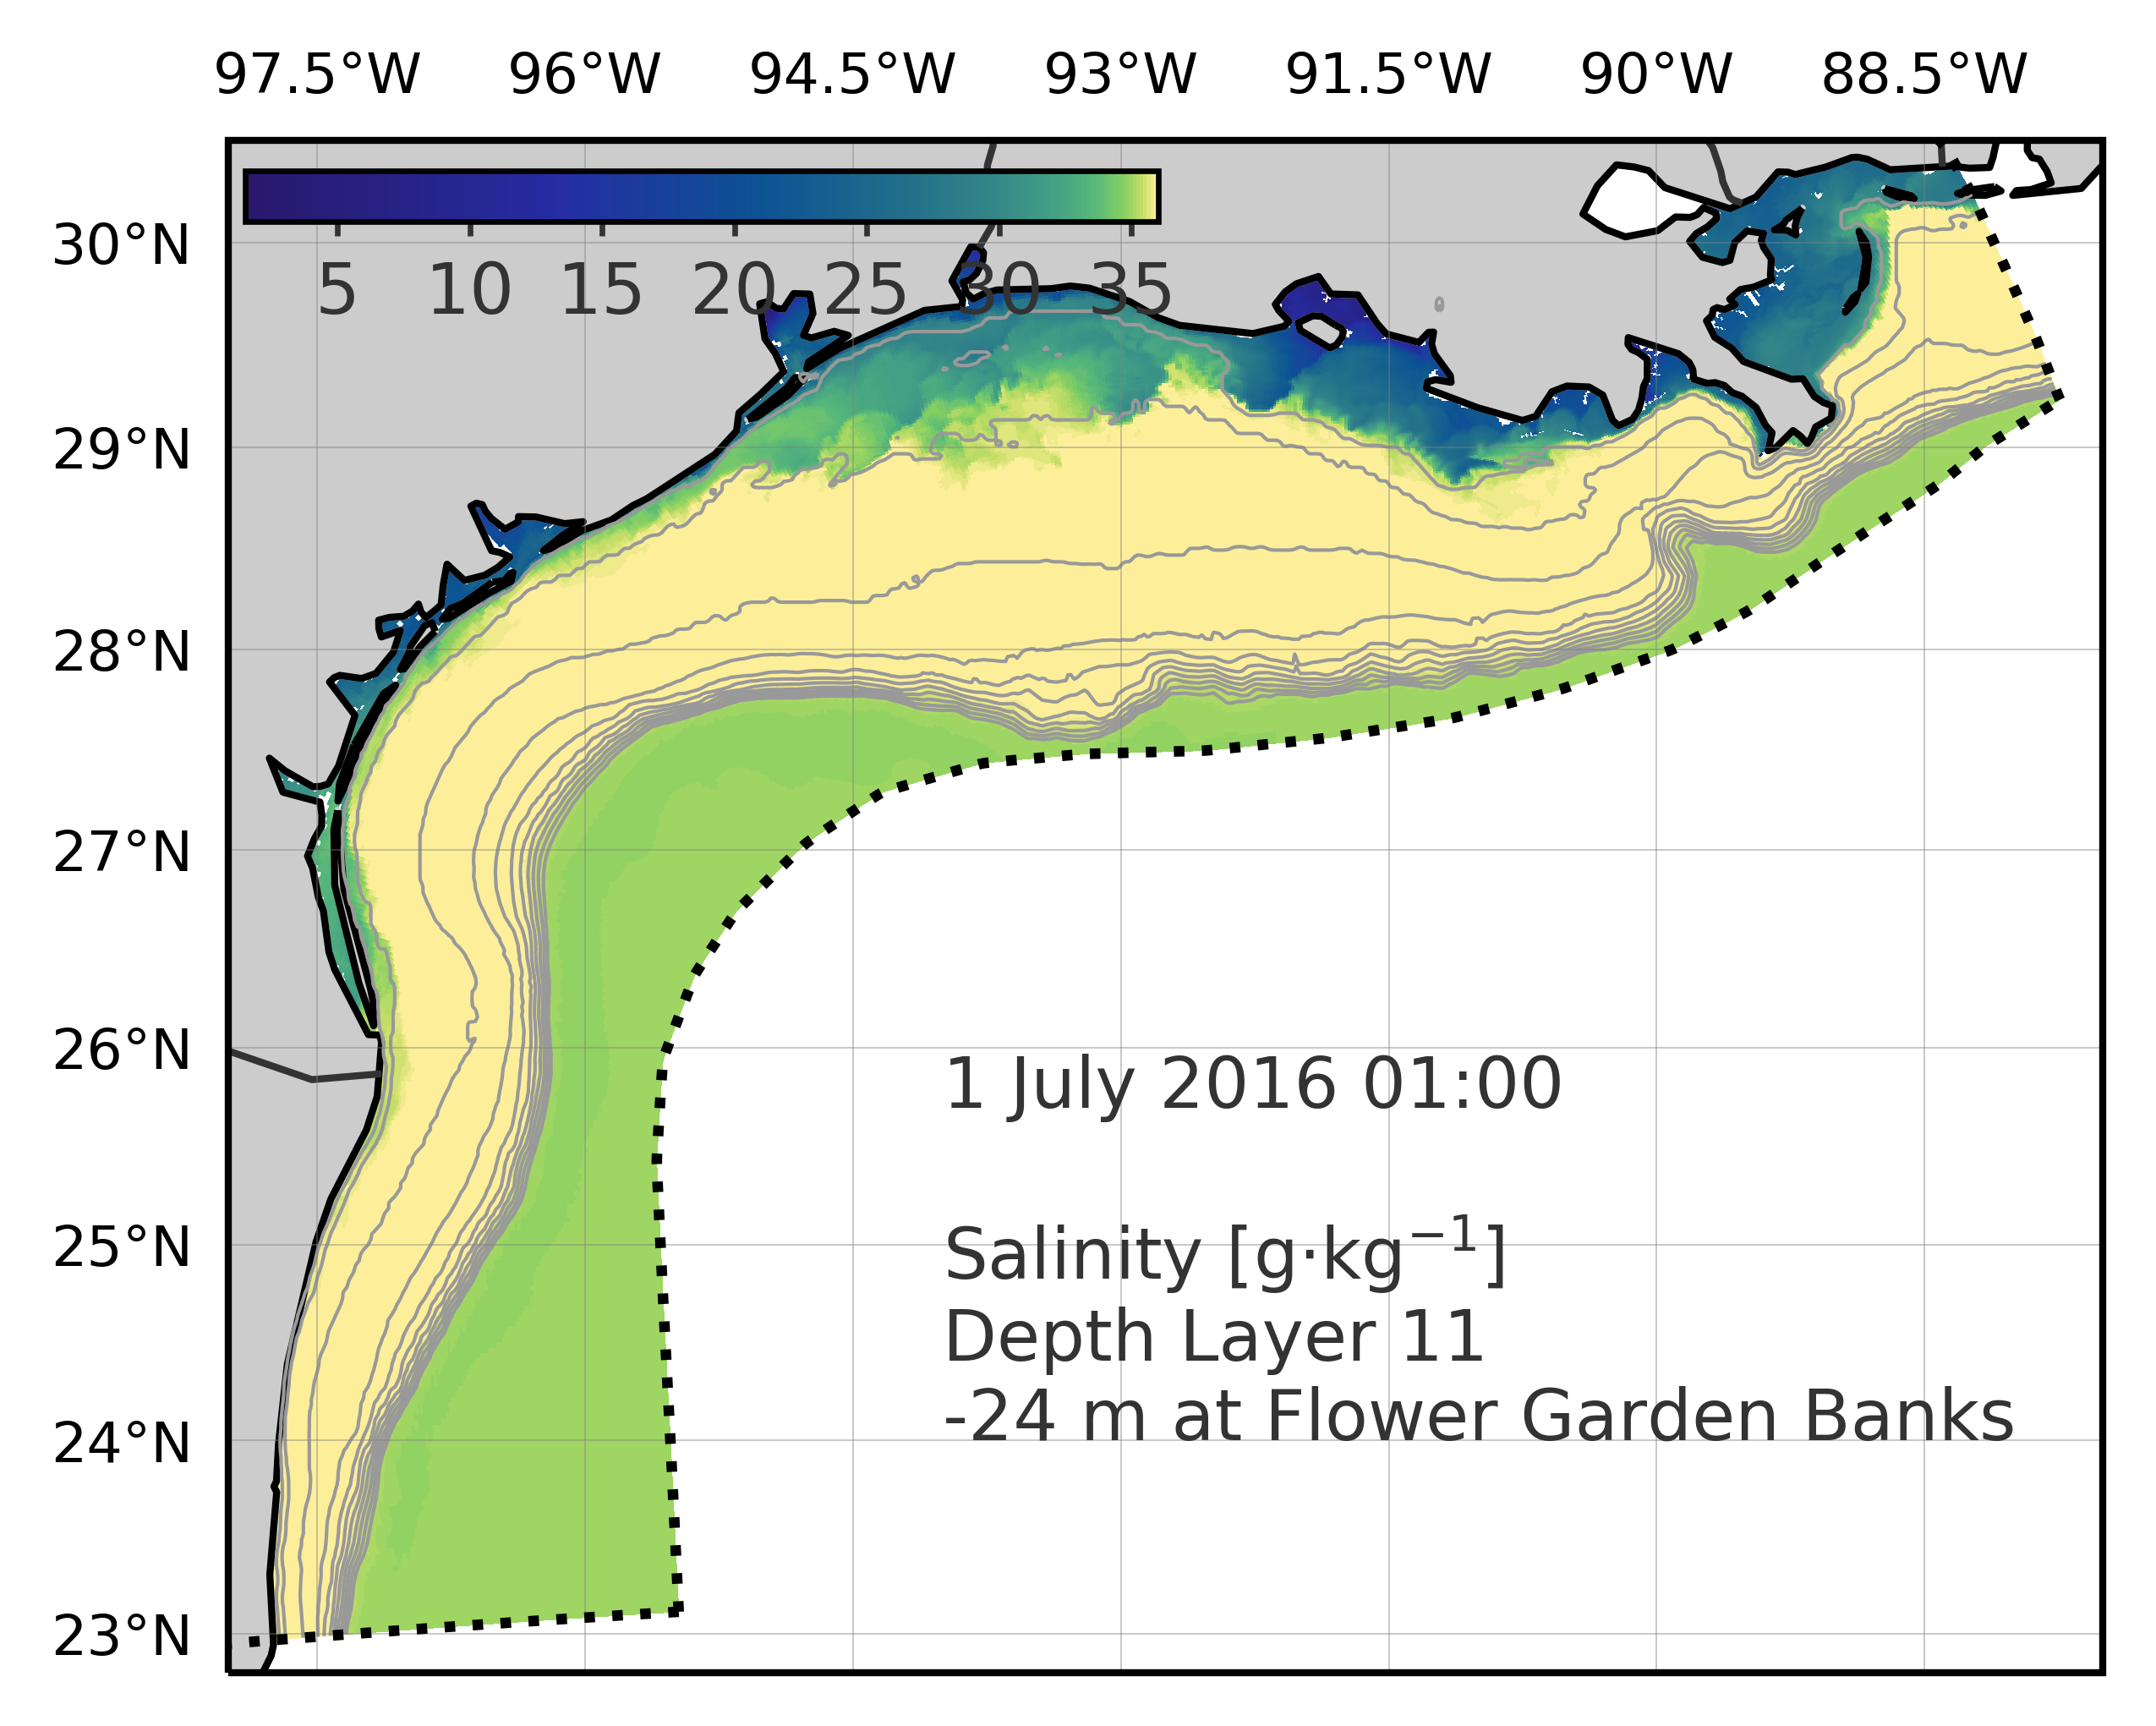

In [40]:
for tind in range(-4412,-4410): #  -3668):
    salt = d["salt"][tind,0,:,:]

    fig = plt.figure(dpi=600)
    fig.tight_layout()   
    
    ax = fig.add_subplot(111, projection=ccrs.Mercator())
    tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
                               col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m',
                               fontsize=8,proj=cartopy.crs.Mercator()) 
    
    mp = ax.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], salt,transform=ccrs.PlateCarree(), cmap=cmap, vmax=36)

    cax = fig.add_axes([0.21, 0.84, 0.3, 0.025]) #colorbar axes
    cb = fig.colorbar(mp, cax=cax, orientation='horizontal')
#     cb.set_label(r'Salinity [g$\cdot$kg$^{-1}$]          ', fontsize=5, color='0.2')
    cb.ax.tick_params(labelsize=10, length=2, color='0.2', labelcolor='0.2')
#     cb.set_ticks(ticks)
    # change colorbar tick color http://stackoverflow.com/questions/9662995/matplotlib-change-title-and-colorbar-text-and-tick-colors
    cbtick = plt.getp(cb.ax.axes, 'yticklabels')
    plt.setp(cbtick, color='0.2')
    
    
    
#     cbar = plt.colorbar(ax.pcolormesh(d["lon_rho"][:,:], d["lat_rho"][:,:], salt, cmap=cm.cm.haline))
#     cbar.set_label('PSU')
# #     ax.set_title(r'Salinity at -24m\n')
#     ax.set_xlabel('Longitude')
#     ax.set_ylabel('Latitude')
    time = datetime.datetime.fromtimestamp(d['ocean_time'][tind])
    ax.text(-94,24, "%d July 2016 %.02d:00\n\n" %(time.day,time.hour) +
            r"Salinity [g$\cdot$kg$^{-1}$]" + "\nDepth Layer 11\n-24 m at Flower Garden Banks", 
            fontsize=10, color='0.2', transform=ccrs.PlateCarree())
    
#     plt.savefig("figures/" + str() + ".png")
#     plt.close()

In [248]:
str(datetime.datetime.fromtimestamp(d['ocean_time'][-3668]))

'2'

# Start time of July 1 2016 is -4412
# End time of July 31 2016 is -3668

In [ ]:
np.sum()